# 📘 Notebook 03 — Pure scikit-learn Baseline

This notebook trains a **pure scikit-learn LinearRegression model**
from scratch, without using the custom `src/` modules.

Goals:
- Recreate the SAME feature engineering as in the main project
- Train / test split
- Standardize features (using sklearn's StandardScaler)
- Train `LinearRegression`
- Evaluate metrics (MAE, RMSE, R²)

This gives us a clean baseline to compare against the custom
Gradient Descent implementation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

In [2]:
# Load raw data
df = pd.read_csv("../data/raw/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Recreate feature engineering
df_fe = df.copy()
df_fe = df_fe.dropna() 

# --- ratio features (copy exactly like in feature_engineering.py) ---
df_fe["rooms_per_household"] = df_fe["total_rooms"] / df_fe["households"]
df_fe["bedrooms_per_room"] = df_fe["total_bedrooms"] / df_fe["total_rooms"]
df_fe["population_per_household"] = df_fe["population"] / df_fe["households"]

# --- log features (copy exact cols you used) ---
df_fe["log_total_rooms"] = np.log1p(df_fe["total_rooms"])
df_fe["log_total_bedrooms"] = np.log1p(df_fe["total_bedrooms"])
df_fe["log_population"] = np.log1p(df_fe["population"])

# --- polynomial features (copy exactly) ---
df_fe["median_income_squared"] = df_fe["median_income"] ** 2
# if you had others, add them too

# --- one-hot encoding for ocean_proximity (copy same logic) ---
df_fe = pd.get_dummies(df_fe, columns=["ocean_proximity"], drop_first=False)

df_fe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,...,population_per_household,log_total_rooms,log_total_bedrooms,log_population,median_income_squared,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,...,2.555556,6.781058,4.867534,5.777652,69.308955,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,...,2.109842,8.867850,7.009409,7.784057,68.913242,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,...,2.802260,7.291656,5.252273,6.208590,52.669855,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,...,2.547945,7.150701,5.463832,6.326149,31.844578,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,...,2.181467,7.395108,5.638355,6.338594,14.793254,False,False,False,True,False


In [4]:
# Split into X / y and train / test
target_col = "median_house_value"

X = df_fe.drop(columns=[target_col])
y = df_fe[target_col]

# Use the SAME random_state as in your Config (e.g. 42 or whatever you set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((16346, 20), (4087, 20))

In [5]:
# Standardize features (sklearn StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train sklearn LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [7]:
# Evaluate sklearn baseline
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(48572.07160220076, np.float64(66645.4869148304), 0.675205688640977)

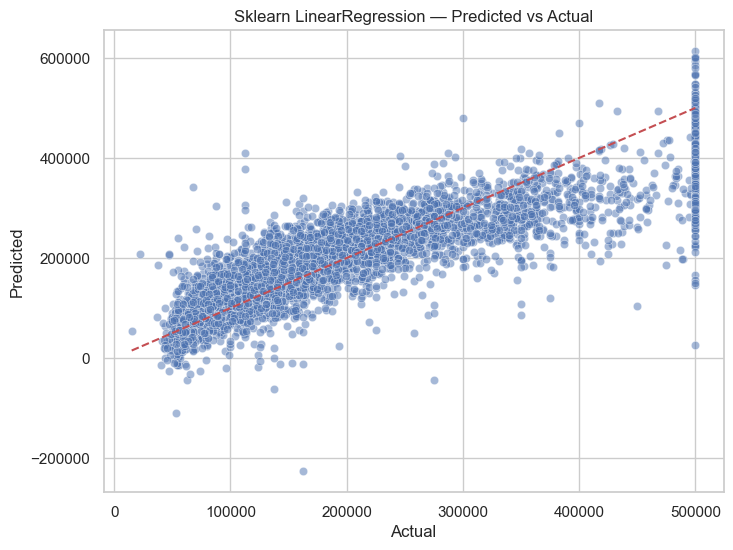

In [8]:
# Plots - Residual vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sklearn LinearRegression — Predicted vs Actual")
plt.show()

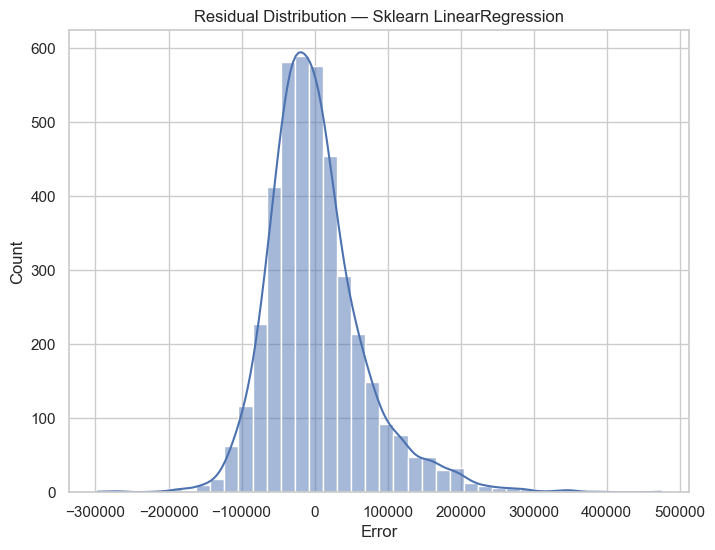

In [9]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual Distribution — Sklearn LinearRegression")
plt.xlabel("Error")
plt.show()

# 📊 Summary of Model Comparison

- The custom Gradient Descent model performs remarkably similar to the
  closed-form `sklearn.LinearRegression` model.

- Differences may arise due to:
  - Learning rate choice
  - Number of iterations
  - Numerical precision
  - Regularization (if enabled)

- Visualizations show that both models:
  - Capture the overall trend accurately
  - Have similar residual shapes
  - Produce comparable error metrics

This confirms that our **manual GD implementation is correct** and
matches the behavior of a professional ML library.